# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 11 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [ждем контеста] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

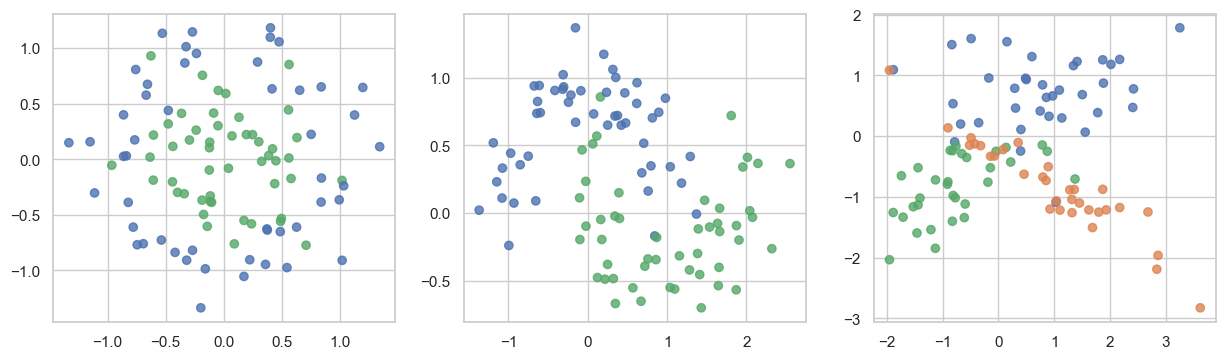

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

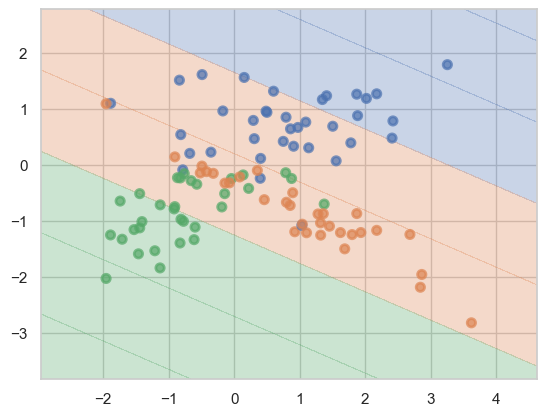

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [8]:
def make_tree(df, min_samples_leaf = None, depth_max = None):
    x, y = df
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=52)
    if (depth_max != None) and (min_samples_leaf != None):
        model = DecisionTreeClassifier(random_state=52, max_depth=depth_max, min_samples_leaf = min_samples_leaf)
        res = model.fit(x_train, y_train)
    else:
        model = DecisionTreeClassifier(random_state=52)
        res = model.fit(x_train, y_train)
    plot_surface(res, x_test, y_test)

    train_accuracy = accuracy_score(res.predict(x_train), y_train)
    test_accuracy = accuracy_score(res.predict(x_test), y_test)

    accuracy_text = (
        f'train acc: {np.round(train_accuracy, 4)}\n'
        f'test acc: {np.round(test_accuracy, 4)}'
    )

    plt.text(
        -2, 2,
        accuracy_text,
        fontsize=8,
        ha='left',
        va='top',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
    )

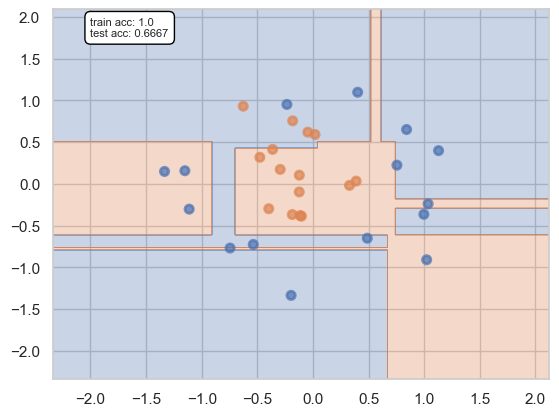

In [9]:
make_tree(datasets[0])

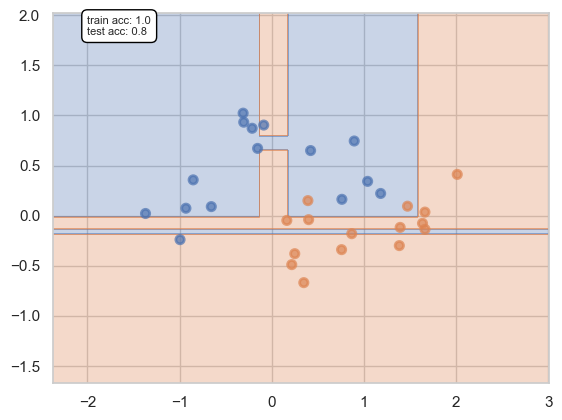

In [10]:
make_tree(datasets[1])

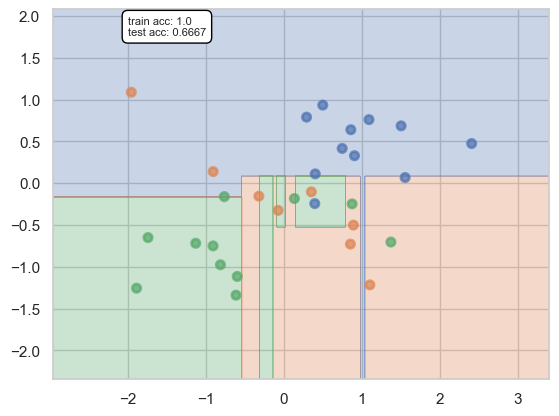

In [11]:
make_tree(datasets[2])

__Ответ:__

Показатель accuracy получается довольно высоким (везде выше 0.67 на тесте), но тем не менее по визуализациям заметно, что модель очень сильно переобучается - возникают узкие зоны, возникашие по причине подгони классикаитора пол отдельный элемент выборки.

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

depths = [None, 1, 2, 3, 4]
min_samples_leafs = [1, 5, 10]

def tree_plot_grid(df, max_depths, min_samples_leafs):
    num_depths = len(max_depths)
    num_leafs = len(min_samples_leafs)

    fig, axes = plt.subplots(num_depths, num_leafs, figsize=(15, 15))
    
    for i, max_depth in enumerate(max_depths):
        for j, min_samples_leaf in enumerate(min_samples_leafs):
            ax = axes[i, j]
            plt.sca(ax)
            make_tree(df, max_depth, min_samples_leaf)
            ax.set_title(f'depth_max={max_depth}, min_samples_leaf={min_samples_leaf}')

    plt.tight_layout()
    plt.show()

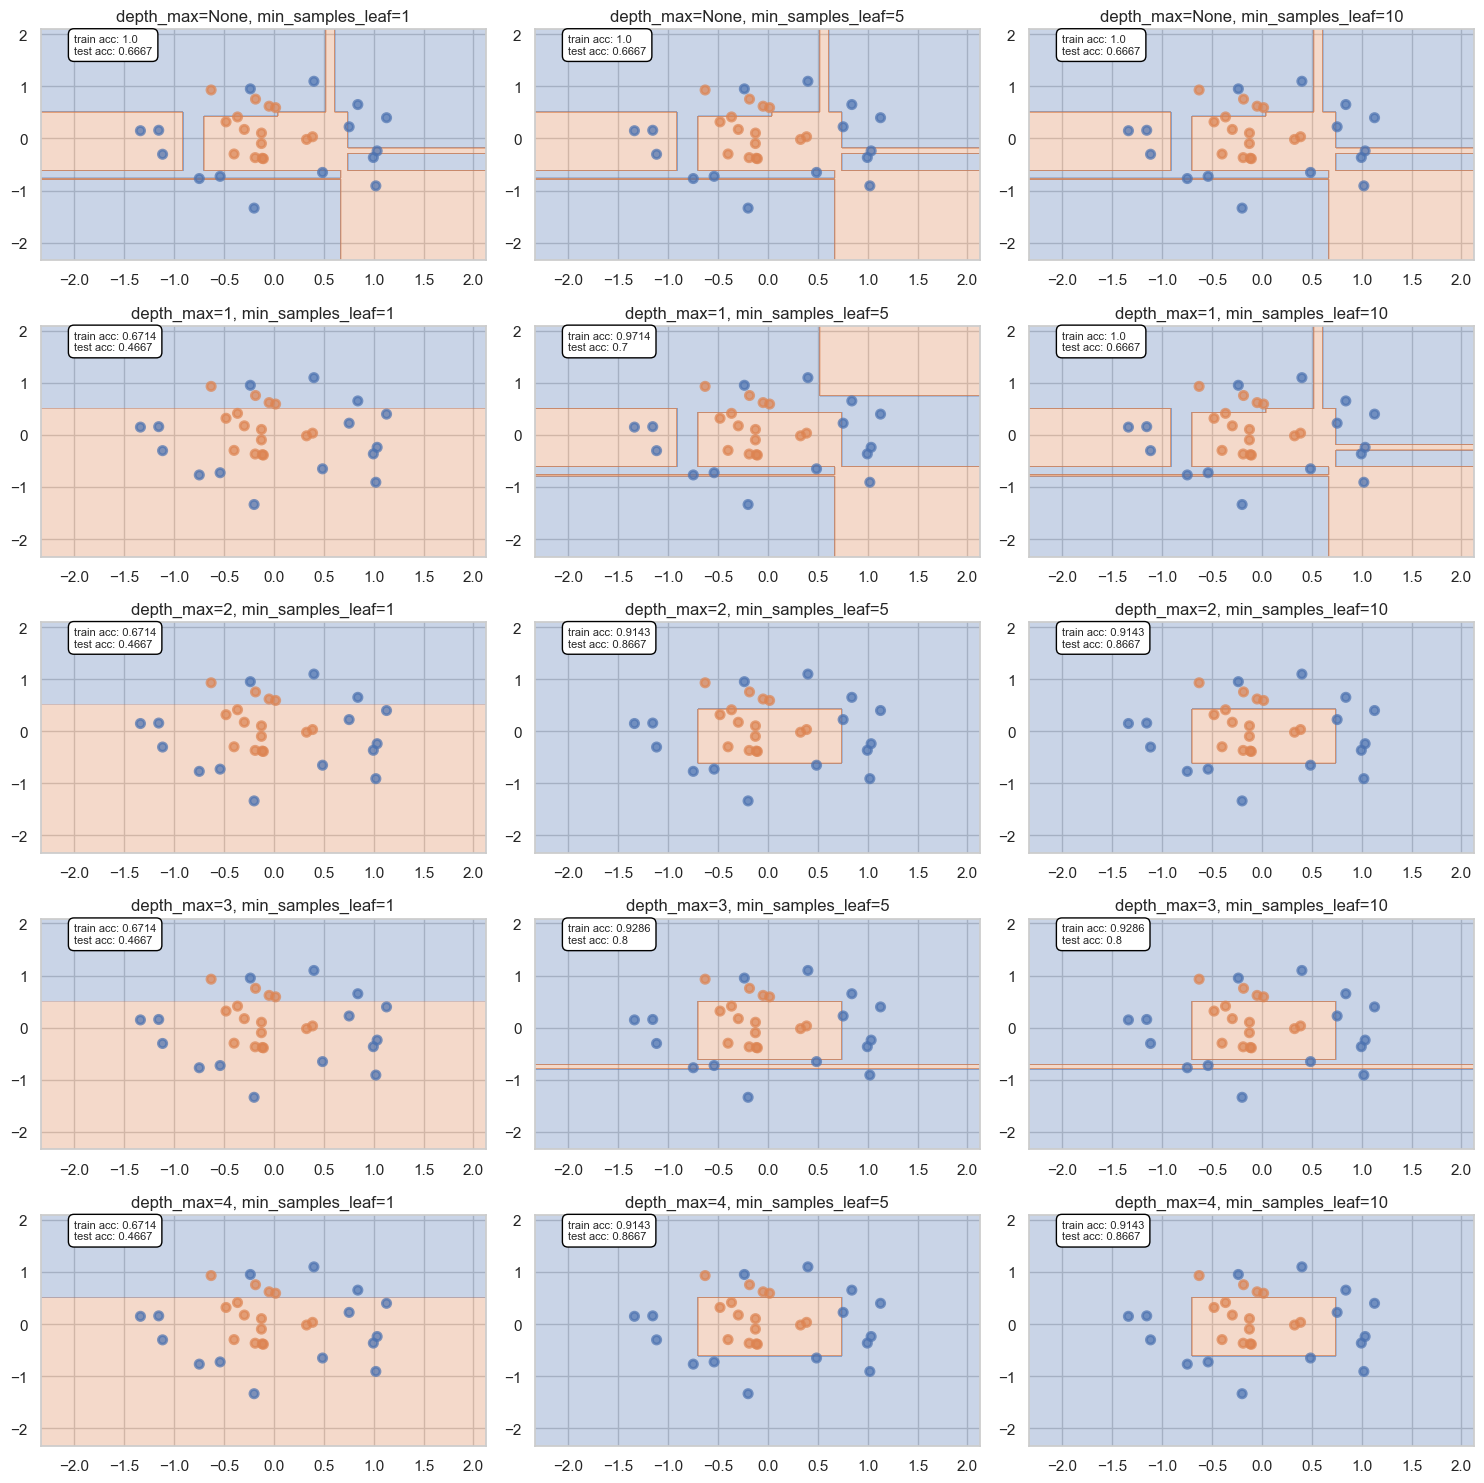

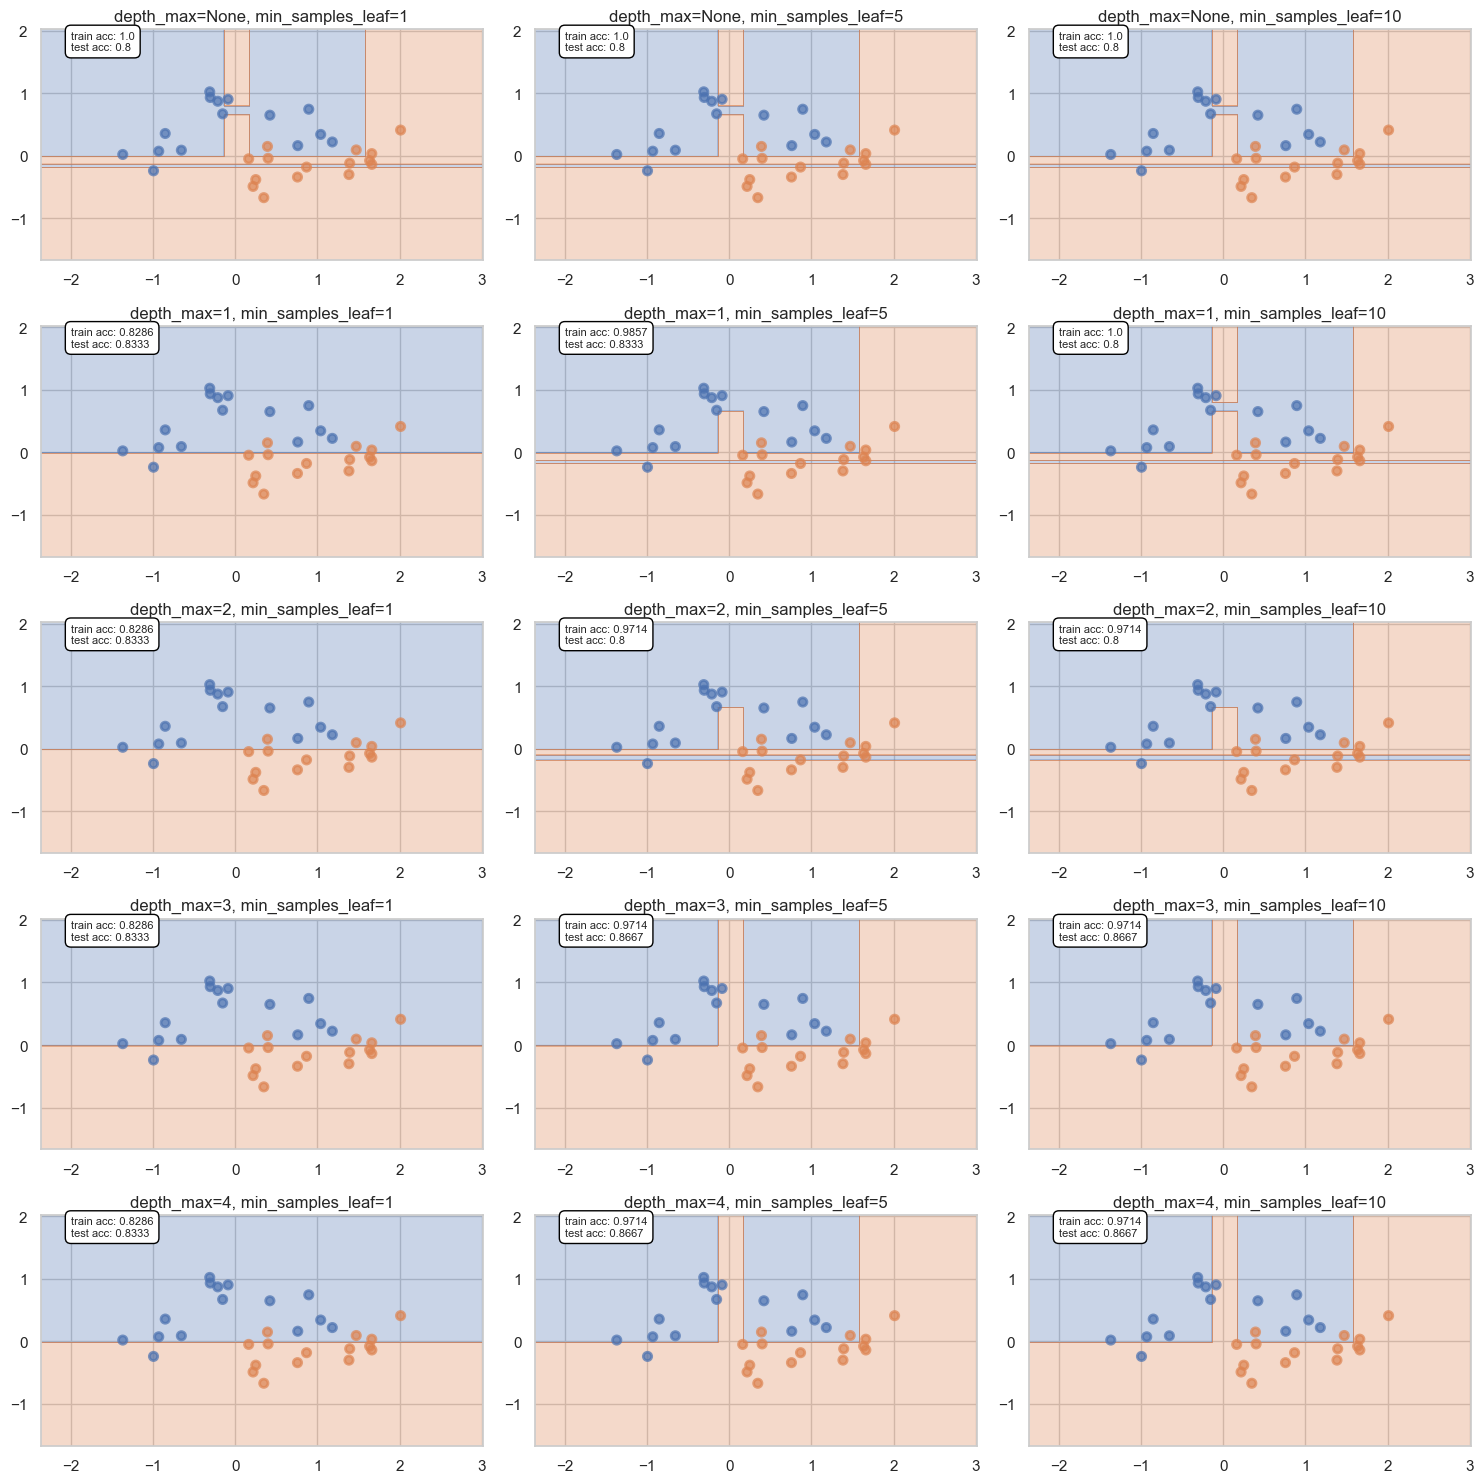

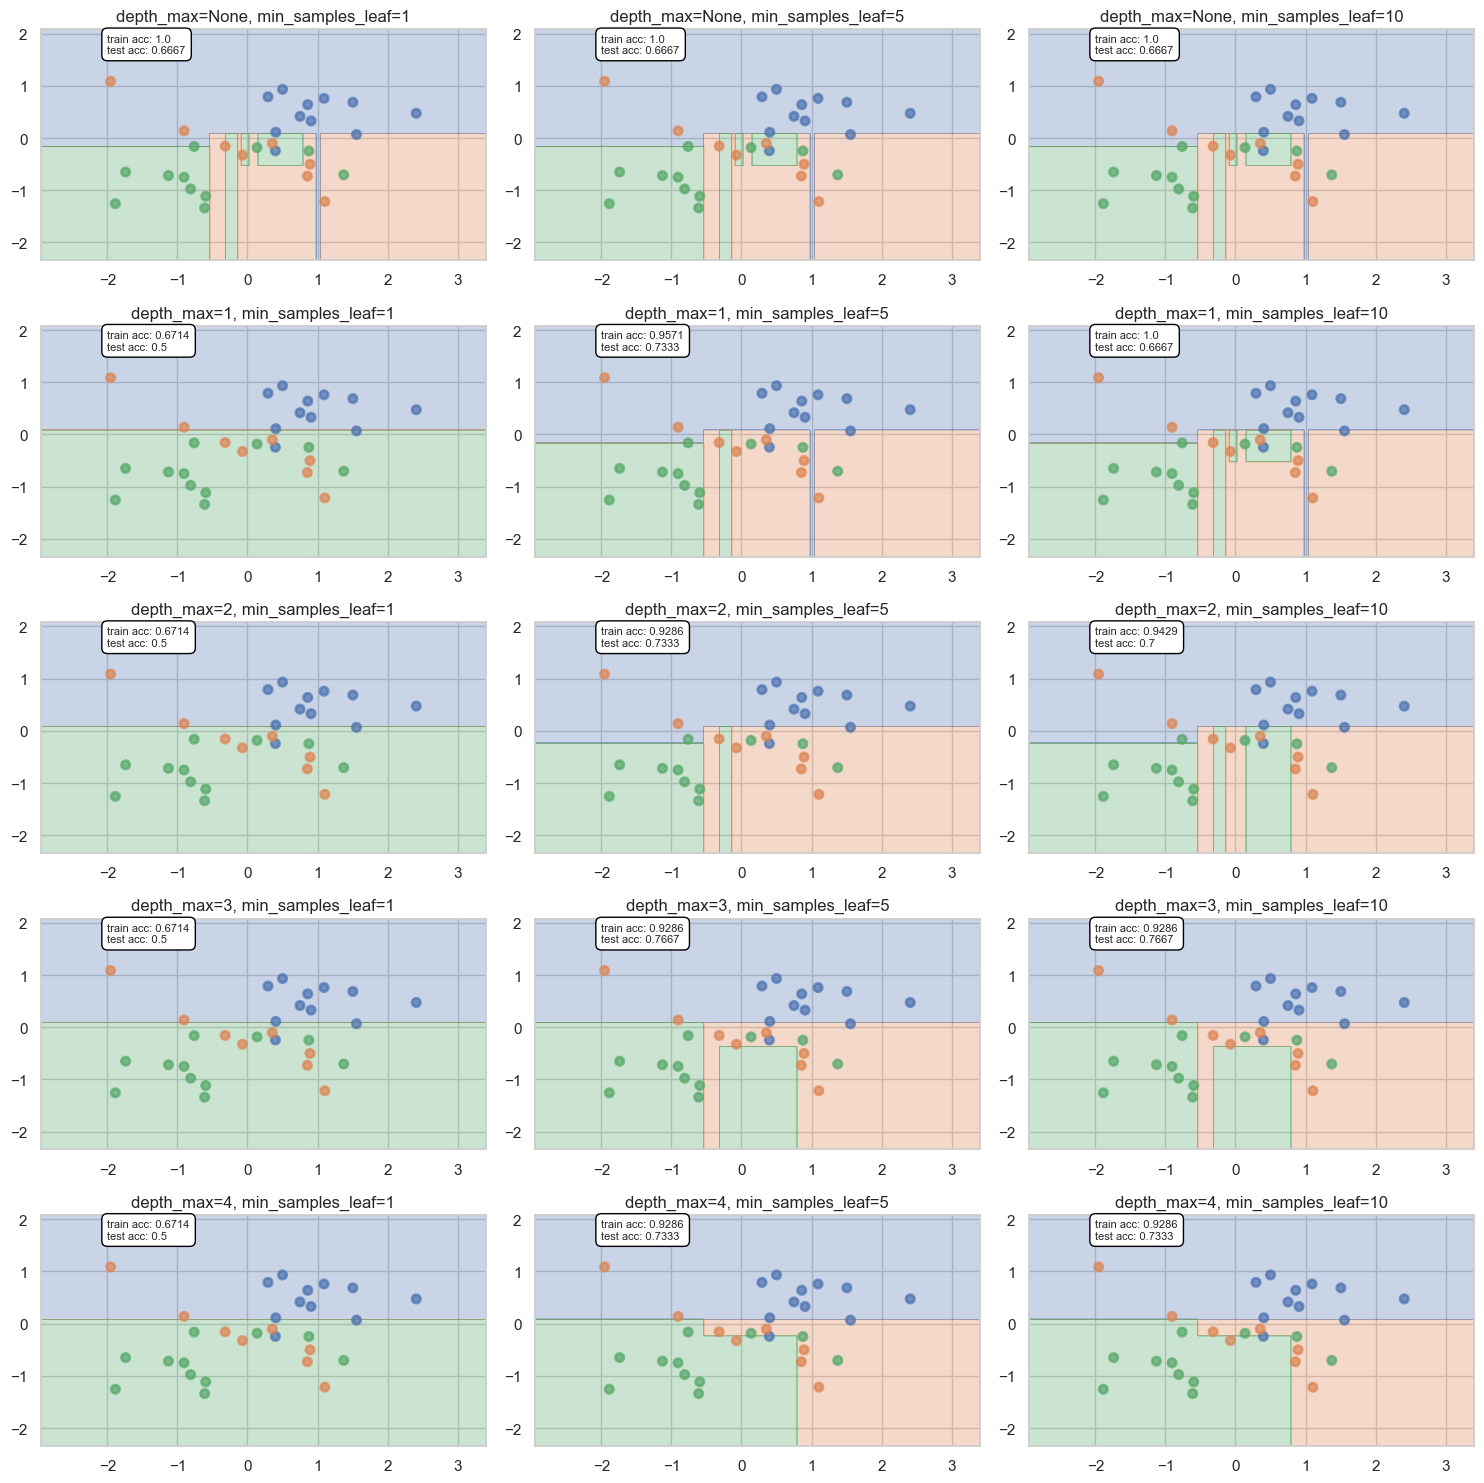

In [13]:
for i in range(3):
    tree_plot_grid(datasets[i], depths, min_samples_leafs)

__Ответ:__

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

https://contest.yandex.ru/contest/72492/run-report/129822970/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [14]:
from hw5code import *

In [15]:
df= pd.read_csv('students.csv')

In [16]:
df.head(3)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0


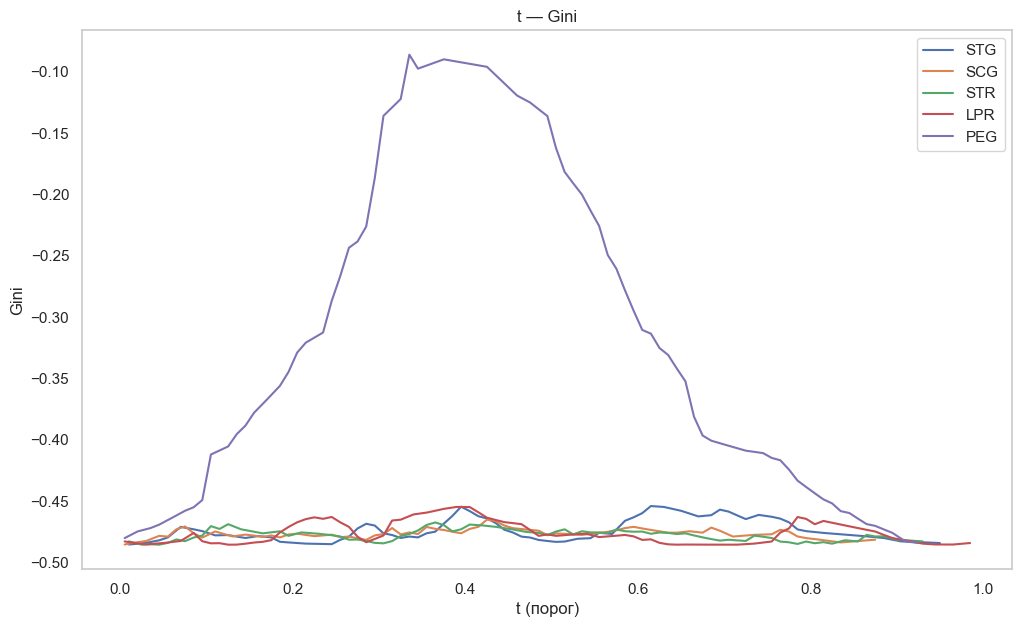

In [17]:
columns = df.columns[:-1]
plt.figure(figsize = (12, 7))
for c in columns:
    thresholds, ginis, threshold_best, gini_best = find_best_split(np.array(df[c]), np.array(df['UNS']))
    plt.plot(thresholds, ginis, label=c)

plt.title("t — Gini")
plt.xlabel("t (порог)")
plt.ylabel("Gini")
plt.legend()
plt.grid()
plt.show()

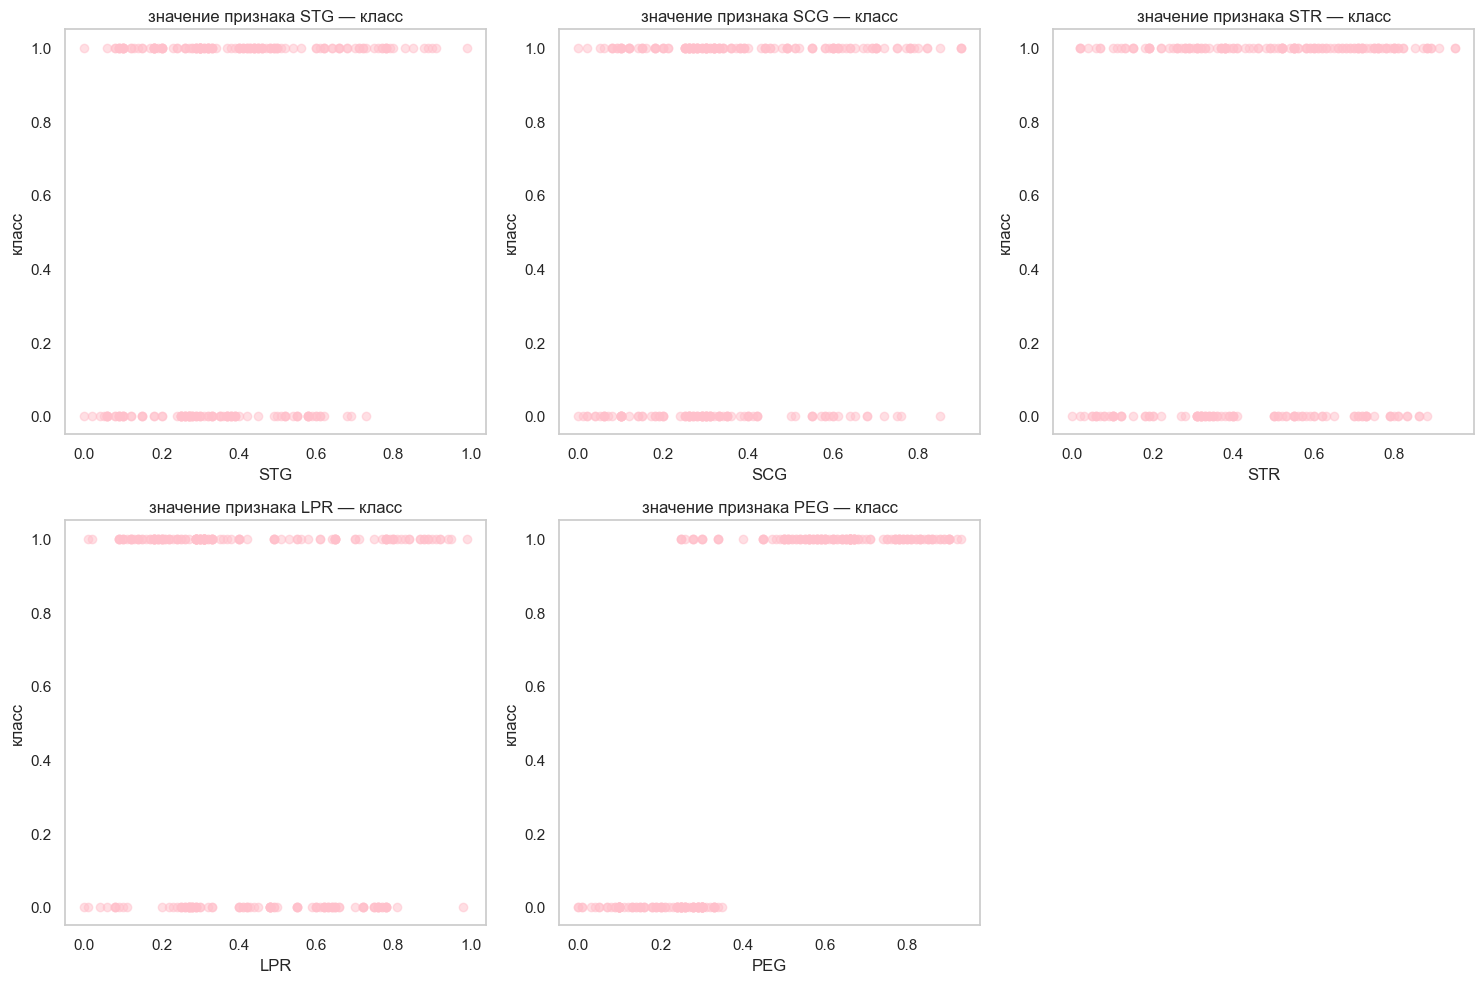

In [18]:
plt.figure(figsize=(15, 10))

for i, c in enumerate(columns):
    plt.subplot(2, 3, i + 1) 
    plt.scatter(df[c], df['UNS'], alpha=0.5, color='pink')
    plt.title(f"значение признака {c} — класс")
    plt.xlabel(c)
    plt.ylabel("класс")
    plt.grid()

plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

Надо разделить по признаку PEG, так как именно он демонстрирует наивысшее значение критерия Джини. Оптимальное деление выборки происходит, когда существует порог, при котором в одном листе оказывается практически один класс, а в другом — другой, так как в таком случае значение критерия Джини будет близким к 0, а график будет иметь отчетливый максимум.

На диаграмме рассеивания видно, что именно значения PEG можно разделить на две части, в каждой из которых значительно преобладают объекты определенного класса. Проблема с делением возникает, когда на диаграмме классы объектов чередуются, что затрудняет разделение выборки на две группы, в случае других критериев кривая не имеет выраженных максимумов - это зашумленную горизонтальную прямую.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

 https://contest.yandex.ru/contest/72492/run-report/129822986/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
from hw5code import *

In [21]:
df = pd.read_csv("mushroom/agaricus-lepiota.data")
le = LabelEncoder() 
df = df.apply(lambda x: le.fit_transform(x))

X = df.drop(columns=['p'])
y = df['p']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print(f"accuracy: {accuracy_score(y_pred, y_test)}")

accuracy: 1.0


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe.

In [22]:
df = pd.read_csv("tic-tac-toe-endgame.csv")

In [23]:
df.head(4)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive


In [24]:
le = LabelEncoder() 
df = df.apply(lambda x: le.fit_transform(x))
 
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) 

In [25]:
q = 30
max_depth_values = range(1, q+1) 
min_samples_split_values = range(2, q+2) 
min_samples_leaf_values = range(1, q+1) 

accuracies_max_depth = []
accuracies_min_samples_split = []
accuracies_min_samples_leaf = []

In [26]:
for max_depth in max_depth_values:
    tree = DecisionTree(feature_types=["categorical"] * X_train.shape[1], max_depth=max_depth)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_max_depth.append(accuracy)

for min_samples_split in min_samples_split_values:
    tree = DecisionTree(feature_types=["categorical"] * X_train.shape[1], min_samples_split=min_samples_split)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_min_samples_split.append(accuracy)

for min_samples_leaf in min_samples_leaf_values:
    tree = DecisionTree(feature_types=["categorical"] * X_train.shape[1], min_samples_leaf=min_samples_leaf)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_min_samples_leaf.append(accuracy)

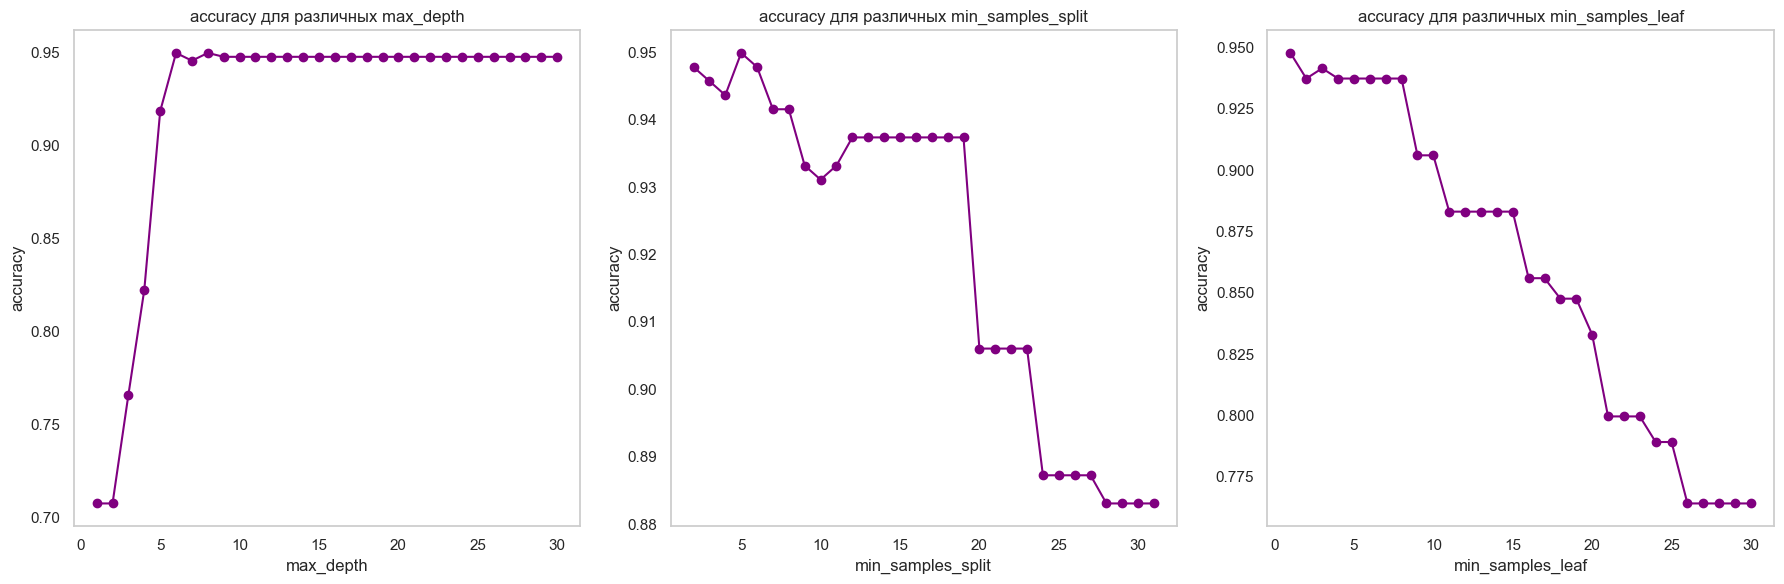

In [27]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(max_depth_values, accuracies_max_depth, marker='o', color='purple')
plt.title('accuracy для различных max_depth')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.grid(False)

plt.subplot(1, 3, 2)
plt.plot(min_samples_split_values, accuracies_min_samples_split, marker='o', color='purple')
plt.title('accuracy для различных min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.grid(False)

plt.subplot(1, 3, 3)
plt.plot(min_samples_leaf_values, accuracies_min_samples_leaf, marker='o', color='purple')
plt.title('accuracy для различных min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.grid(False)

plt.tight_layout()
plt.show()

Результаты получились довольно интуитивные:

1. Заметим, что при довольно глубоков дереве получаем очень высокий акьюраси, близки к 1 (модель сильно преобучается под данные)

2. Параметр min_samples_split - это минимальное количество объектов для разделения узла. Увеливение может помочь избежать переобучения, так как оно предотвращает создание очень мелких узлов, то есть логично, что акьюраси может падать, с ростом значения этого гиперпараметра мы будем все сильнее недоуобучать модель

3. Третий парметр регулирует минимальное количество образцов, которые должны оставаться в листе после разделения. Чем большее значение паратметра будет требовать, тем больше будут листы в смысле количества объектов в нем, то есть тем сильнее мы будем нежообучать модель



__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Итерируетесь по всем порогам
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

Не загрузился нормально, я скачала :

In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# data = fetch_california_housing(as_frame=True)
data = pd.read_csv('california_housing.csv')
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [38]:
X = data.drop('MedHouseVal', axis = 1)
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
param_grid_sklear = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4]
}

grid_tree_sklearn = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_sklear, 
                        scoring='neg_mean_squared_error', cv=3)
grid_tree_sklearn.fit(X_train, y_train)

best_sklearn = grid_tree_sklearn.best_estimator_
y_pred_sklearn = best_sklearn.predict(X_test)
rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))
r2_sklearn = np.sqrt(r2_score(y_test, y_pred_sklearn))

print(f"RMSE для DecisionTreeRegressor: {rmse_sklearn}")
print(f"R2 для DecisionTreeRegressor: {r2_sklearn}")

RMSE для DecisionTreeRegressor: 0.6460985744235846
R2 для DecisionTreeRegressor: 0.8254940302330901


In [41]:
param_grid_my_tree = {
    'max_depth': [2, 4, 5],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4]
}

grid_my_tree = GridSearchCV(LinearRegressionTree(), param_grid_my_tree, 
                        scoring='neg_mean_squared_error', cv=3)
grid_my_tree.fit(X_train, y_train)

best_my_tree = grid_my_tree.best_estimator_

y_pred_my_tree = best_my_tree.predict(X_test)

rmse_my_tree = np.sqrt(mean_squared_error(y_test, y_pred_my_tree))
r2_my_tree = np.sqrt(r2_score(y_test, y_pred_my_tree))

print(f"RMSE для LinearRegressionTree: {rmse_my_tree}")
print(f"R2 для LinearRegressionTree: {r2_my_tree}")

RMSE для LinearRegressionTree: 0.6397929886619518
R2 для LinearRegressionTree: 0.8292333832060129


Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

R2 для дерева из sklearn: 0.9703


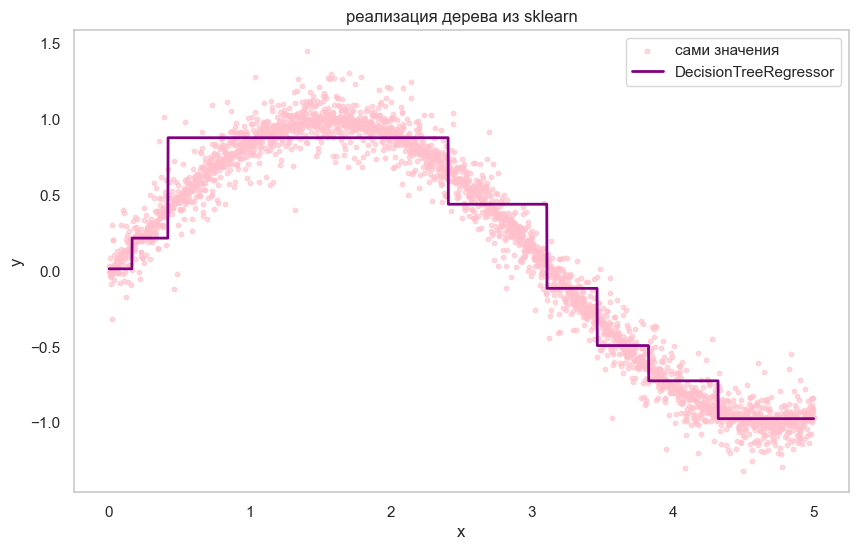

In [35]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

sklearn_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
sklearn_tree.fit(x_train, y_train)

y_pred_tree = sklearn_tree.predict(x)
r2_sklearn_tree = np.sqrt(r2_score(y, y_pred_tree))
print(f"R2 для дерева из sklearn: {r2_sklearn_tree:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='pink', s=10, label='сами значения', alpha=0.6)
plt.plot(x, y_pred_tree, color='purple', label='DecisionTreeRegressor', linewidth=2)
plt.title('реализация дерева из sklearn')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(False)
plt.show()

R2 для собственной реализации дерева: 0.9873


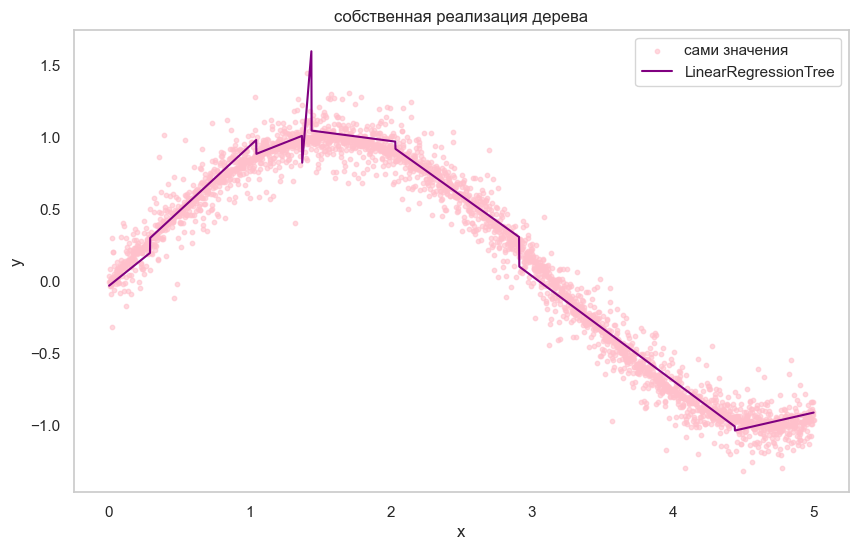

In [36]:
my_tree = LinearRegressionTree(max_depth=3)
my_tree.fit(x_train, y_train)
y_pred_my_tree = my_tree.predict(x)
r2_my_tree = np.sqrt(r2_score(y, y_pred_my_tree))
print(f"R2 для собственной реализации дерева: {r2_my_tree:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='pink', s=10, label='сами значения', alpha=0.6)
plt.plot(x, y_pred_my_tree, color='purple', label='LinearRegressionTree')
plt.title('собственная реализация дерева')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(False)
plt.show()

**Ответ:**

На самом деле, можно заметить, что моя модель выдает неконстатные предстказания, поэтому она объясняет большую долю дисперсии, поэтому и R^2 больше (0.9882 > 0.9761).

При этом у моей больше большая склоннаость к переобучению (это даже видно на графиках - наблюдаются отдельные пиковые значения).

Вставьте что угодно, описывающее ваши впечатления от этого задания:

   ![Описание изображения](https://i.ibb.co/9gBVpR7/2024-12-13-11-27-09.png)
   